# Final Capstone Project:
## Predicting Austin Home Prices from Zillow Images 

## Data Wrangling/EDA Notebook 1: Accompanying CSV file

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the csv file that accompanied the images indo a dataframe:
file = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/austinHousingData.csv'
df = pd.read_csv(file)
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

Column # 46 'homeImage' is the name of the image file... this will be important as it is how the image files are named.

Column # 18 is 'latestPrice' and this will be the target feature. 

### Explore the Target Feature: Price

In [4]:
df['latestPrice'].describe().astype(int)

count       15171
mean       512767
std        453185
min          5500
25%        309000
50%        405000
75%        575000
max      13500000
Name: latestPrice, dtype: int64

##### Average price is about 500K
##### Most expensive home  13.5M 
##### Cheapest listing is 5500!!

In [5]:
# exploring the cheapest listings:

df.sort_values(by=['latestPrice'],
axis=0, ascending=True, inplace=False).head(10).T

,844,5796,785,9310,13184,14335,9272,14580,4823,9869
zpid,29361735,70337317,83123966,29381466,29332104,29338824,29471989,29339192,29492341,64772328
city,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
streetAddress,3302 Blue Jay Ln,1812 Eagles Glen Cv,7109 Greenshores Dr,1907 Holly St,1500 Hartford Rd,3602 River Rd,1604 Eva St,2800 Westlake Dr,8801 Young Ln,4109 E 12th St #2
zipcode,78732,78732,78730,78702,78703,78703,78704,78746,78737,78721
description,"3302 Blue Jay Ln, Austin, TX 78732 is a single...",Ideally situated in the prestigious gated Univ...,"7109 Greenshores Dr, Austin, TX 78730 is a sin...",Be the first to move in this luxurious home! C...,"1500 Hartford Rd, Austin, TX 78703 is a single...",Beautiful mid century modern home with a conte...,Rare one-of-a-kind chic home in Bouldin! Priva...,"Fabulous, sunny and comfortable in peaceful We...",Coming soon! This exclusive home is not listed...,Charming condo in one of Austin's desirable Ea...
latitude,30.3837,30.355,30.3442,30.253,30.285,30.307,30.248,30.3095,30.213,30.2783
longitude,-97.9135,-97.8922,-97.8174,-97.7258,-97.7619,-97.7745,-97.7519,-97.7816,-97.9212,-97.6887
propertyTaxRate,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98
garageSpaces,4,3,0,2,0,2,2,2,3,1
hasAssociation,False,True,True,False,False,True,False,False,True,True


Due to being alarmed at a listing for only 5500 USD, I cross checked some of these listings on Zillow. The home at 3302 Blue Jay Ln, Austin, TX 78732 has 5 bedrooms and sold in 2018 for around 2M USD.

I think there must be some errors in the data with these low values. The cheapest listings on Zillow are currently in the 100,000 USD range, with some empty lots as low as 70,000 USD.  I would recommend removing the entries in the dataset that are less than 70,000 USD. 

In [6]:
# get number of entries that are below 70,000 as these could be errors
len(df[df['latestPrice']<70000])


22

In [7]:
# exploring the most expensive listings:

df.sort_values(by=['latestPrice'],
axis=0, ascending=False, inplace=False).head(10).T

,2316,14275,1399,290,14639,1298,14376,14395,14627,1360
zpid,125904370,80097372,29341549,29344920,29342048,29344579,29343242,29343220,29342058,70337612
city,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
streetAddress,12400 Cedar St,5909 Lookout Mountain Dr,1101 N Weston Ln,2105 Island Wood Rd,3904 Waters Edge Dr,5401 Maryanna Dr,4902 Tortuga Pl,4406 Island Cv,3811 Westlake Dr,14300 Flat Top Ranch Rd
zipcode,78732,78731,78733,78733,78731,78746,78731,78731,78746,78732
description,12400 Cedar Street - Villa Del Lago is a uniqu...,"5909 Lookout Mountain Dr, Austin, TX 78731 is ...",This beautiful 10+ acre site has endless possi...,-,"3904 Waters Edge Dr, Austin, TX 78731 is a sin...",Gated private cul-de- sac estate on 5 acres w ...,Inspired by the 160 ft of Lake Austin waterfro...,This beautiful move-in ready estate in the pre...,Beautiful contemporary home sitting on 100' of...,Huge Price Improvement. Prized waterfront retr...
latitude,30.3929,30.3454,30.3234,30.3372,30.3221,30.3378,30.3326,30.3293,30.3259,30.3762
longitude,-97.8776,-97.7812,-97.8422,-97.8467,-97.7751,-97.7903,-97.7803,-97.7783,-97.7796,-97.913
propertyTaxRate,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98
garageSpaces,5,2,0,3,0,0,2,0,4,0
hasAssociation,False,True,True,True,True,True,False,True,False,True


After searching Zillow for their currently listings in Austin and sorting by highest to lowest, the most expensive listing is 12.9M USD.  These data in the dataset were scraped in January 2021, so I think that the listings in the range of 10-13.5M USD are ok. I would not recommend removing any entrees from the higher price end of the dataset. 

In [8]:
# Remove the 22 listings that are less that $70K

df = df[df['latestPrice']>=70000]

In [9]:
# check that they were removed
df['latestPrice'].describe().astype(int)

count       15149
mean       513467
std        453140
min         70000
25%        309000
50%        405000
75%        575000
max      13500000
Name: latestPrice, dtype: int64

In [10]:
# the min is now 70,000 and the average is now $513,467.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15149 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15149 non-null  int64  
 1   city                        15149 non-null  object 
 2   streetAddress               15149 non-null  object 
 3   zipcode                     15149 non-null  int64  
 4   description                 15149 non-null  object 
 5   latitude                    15149 non-null  float64
 6   longitude                   15149 non-null  float64
 7   propertyTaxRate             15149 non-null  float64
 8   garageSpaces                15149 non-null  int64  
 9   hasAssociation              15149 non-null  bool   
 10  hasCooling                  15149 non-null  bool   
 11  hasGarage                   15149 non-null  bool   
 12  hasHeating                  15149 non-null  bool   
 13  hasSpa                      151

In [12]:
# there are now 15149 entries

In [13]:
# changing the zipcode type to 'string'
df['zipcode'] = df['zipcode'].astype(str)

In [14]:
# changing the latestPrice type to 'integer'
df['latestPrice'] = df['latestPrice'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15149 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15149 non-null  int64  
 1   city                        15149 non-null  object 
 2   streetAddress               15149 non-null  object 
 3   zipcode                     15149 non-null  object 
 4   description                 15149 non-null  object 
 5   latitude                    15149 non-null  float64
 6   longitude                   15149 non-null  float64
 7   propertyTaxRate             15149 non-null  float64
 8   garageSpaces                15149 non-null  int64  
 9   hasAssociation              15149 non-null  bool   
 10  hasCooling                  15149 non-null  bool   
 11  hasGarage                   15149 non-null  bool   
 12  hasHeating                  15149 non-null  bool   
 13  hasSpa                      151

In [16]:
#######################
# Setting fontsizes for graphs

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#########################

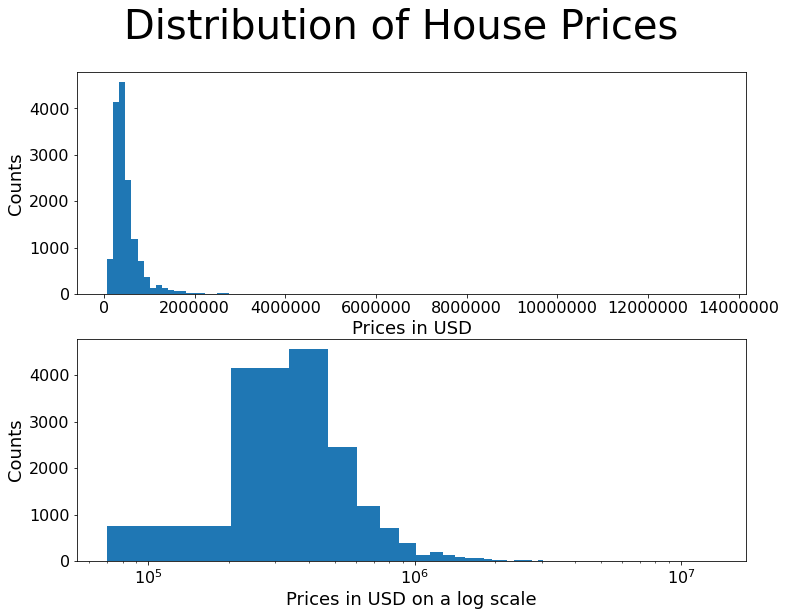

In [17]:
# Plotting the distribution of the prices
fig, (ax1,ax2) = plt.subplots((2), figsize=(12, 9))

fig.suptitle('Distribution of House Prices', fontsize=40)


ax1.hist(df['latestPrice'], bins=100)
#ax1.ticklabel_format(style='sci')
#ax.set_xscale('log')

#ax1.set_title('')
ax1.set_ylabel('Counts',fontsize=18)
ax1.set_xlabel('Prices in USD', fontsize=18)
ax1.ticklabel_format(style='plain')

ax2.hist(df['latestPrice'], bins=100)

ax2.set_xscale('log')
#ax2.ticklabel_format(style='plain')
#ax2.set_title('Distribution of House Prices')
ax2.set_ylabel('Counts',fontsize=18)
ax2.set_xlabel('Prices in USD on a log scale', fontsize=18)
#ax2.ticklabel_format(style='plain')
plt.show()

##### The majority of homes are below 1 million USD. 

In [18]:
print(df['latestPrice'].value_counts())

print('There are ' + str(len(df['latestPrice'].value_counts())) + ' unique values for price.')

325000    202
450000    189
375000    182
350000    179
425000    177
         ... 
510250      1
583990      1
294990      1
675900      1
499700      1
Name: latestPrice, Length: 2345, dtype: int64
There are 2345 unique values for price.


### Explore the other features

In [19]:
df['city'].unique()
df['city'].value_counts()

austin              14998
del valle              86
pflugerville           36
driftwood              12
manor                   6
dripping springs        5
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

In [20]:
df['homeType'].value_counts()

Single Family            14224
Condo                      468
Townhouse                  173
Multiple Occupancy          96
Vacant Land                 81
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [21]:
 # take away: some of the homes are not listed as in Austin, but most are.
 # most homes are single-family, condo, or townhouse. 

In [22]:
# lets see the 'other' homes:
df[df['homeType']=='Other'].describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
zpid,6,66620212,45984673,29390994,29474549,47152559,107491412,124838920
latitude,6,30,0,30,30,30,30,30
longitude,6,-97,0,-97,-97,-97,-97,-97
propertyTaxRate,6,2,0,1,1,1,1,2
garageSpaces,6,1,1,0,1,2,2,3
parkingSpaces,6,1,1,0,1,2,2,3
yearBuilt,6,1997,17,1971,1989,1999,2012,2015
latestPrice,6,586566,134190,415000,505125,565000,676250,775900
numPriceChanges,6,1,0,1,1,2,2,3
latest_salemonth,6,6,3,2,3,5,9,11


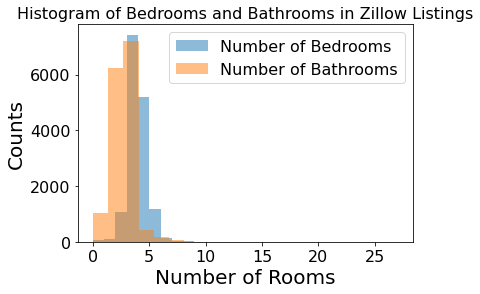

In [24]:
# Plotting the number of bedrooms and bathrooms represented in the data

fig, ax = plt.subplots(1, figsize=(6, 4))
plt.hist(df['numOfBedrooms'], bins = 20, alpha=0.5)
plt.hist(df['numOfBathrooms'], bins=20, alpha=0.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Counts')
plt.title('Histogram of Bedrooms and Bathrooms in Zillow Listings')
plt.legend(['Number of Bedrooms', 'Number of Bathrooms'])
#plt.fig_size(3,3)
plt.show()

In [25]:
# take away: most of the homes have normally distributed data for number of bedrooms and bathrooms. 
# 3 and 4 bedrooms is most common.
# 2 and 3 bathrooms is most common.
# There is a listing with 20 bedrooms and a listing with 27 bathrooms, we will investigate these later.

### Feature Correlations

<AxesSubplot:>

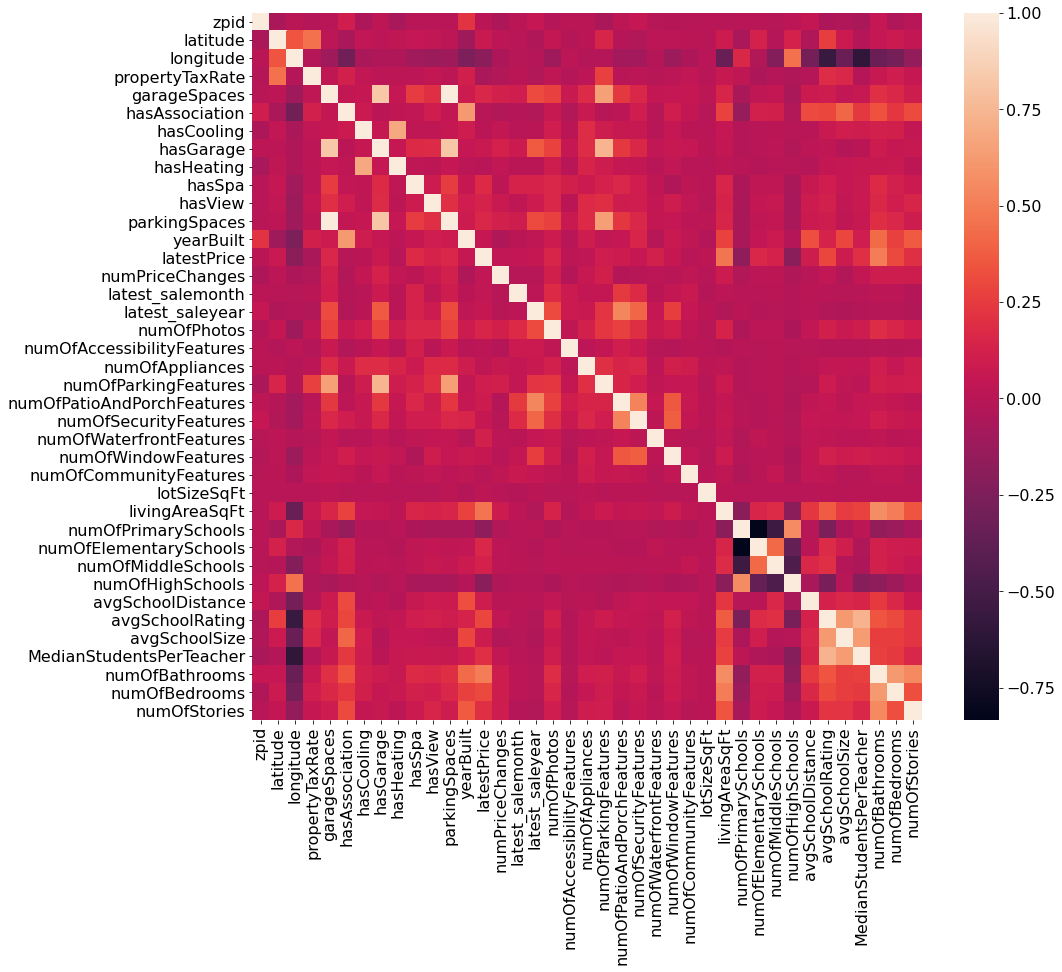

In [26]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(15, 13))
sns.heatmap(df.corr())


In [27]:
# Postive correlation with price: livingAreaSqFt, avgSchoolRating, numofBathrooms

# Negative correlation with price: numOfHighSchools, numOfPrimarySchools

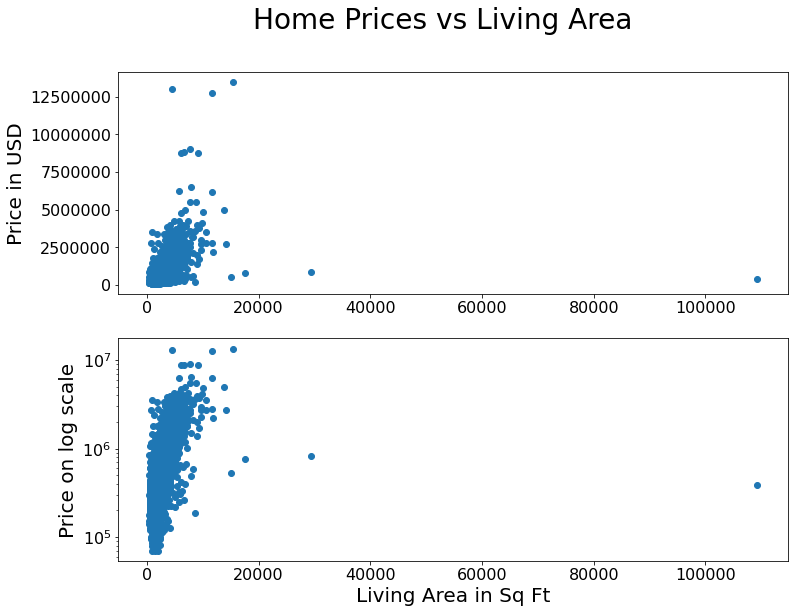

In [28]:
fig, ax = plt.subplots(2, figsize=(12, 9))
plt.suptitle('Home Prices vs Living Area')
ax[0].scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
#ax[0].set_xlabel('Living Area in Sq Ft')
#ax[0].set_yscale('linear')
ax[0].ticklabel_format(style='plain')
ax[0].set_ylabel('Price in USD')

ax[1].scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
ax[1].set_xlabel('Living Area in Sq Ft')
ax[1].set_ylabel("Price on log scale")
ax[1].set_yscale('log')

plt.show()

In [29]:
# these is a listing with over 100,000 square feet, this seems out of the ordinary, 
# we will investigate this listing

In [30]:
# exploring the largest home based on living area sq feet

df.sort_values(by=['livingAreaSqFt'],
axis=0, ascending=False, inplace=False).head(10).T

,705,2557,10588,2316,14257,5328,375,4753,1399,1360
zpid,70330356,64523076,29476730,125904370,29344391,29327226,89551873,29328861,29341549,70337612
city,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
streetAddress,201 Marly Way,9704 Saugus Ln,3303 Garden Villa Ln,12400 Cedar St,5102 Beverly Skyline,3509 Lost Creek Blvd,14800 Flat Top Ranch Rd,7702 Sandia Loop,1101 N Weston Ln,14300 Flat Top Ranch Rd
zipcode,78733,78733,78704,78732,78731,78735,78732,78735,78733,78732
description,Level building site with great canyon views an...,"New Construction, EANES Schools, 4bed 3 bath, ...","3303 Garden Villa Ln, Austin, TX 78704 is a va...",12400 Cedar Street - Villa Del Lago is a uniqu...,Large lot near Highland Park Elementary in the...,"*$6,762,377 is Tax Value - Set in exclusive Ba...",GRACIOUS LUXURY ON LAKE AUSTIN\r\nThis award-w...,Perfectly poised on 4.5+ acres in the highly r...,This beautiful 10+ acre site has endless possi...,Huge Price Improvement. Prized waterfront retr...
latitude,30.3235,30.3459,30.2349,30.3929,30.3359,30.2722,30.369,30.2771,30.3234,30.3762
longitude,-97.8615,-97.86,-97.7703,-97.8776,-97.7654,-97.856,-97.9127,-97.8602,-97.8422,-97.913
propertyTaxRate,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98
garageSpaces,0,0,2,5,0,7,6,5,0,0
hasAssociation,True,True,False,False,False,True,True,True,True,True


In [31]:
# it is a 'level building site, no actual home on the site'
# drop the home with unusually large living area
b = df[(df.livingAreaSqFt == 109292)].index
df = df.drop(b)

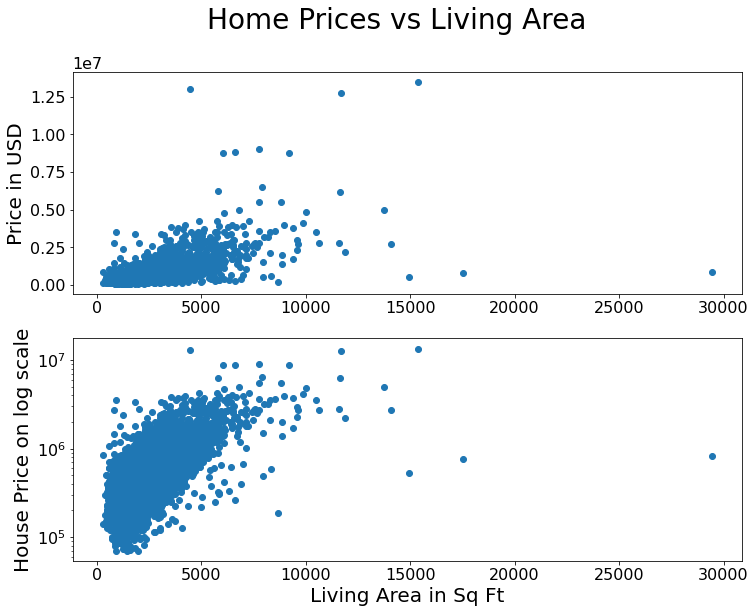

In [32]:
# lets plot living area by price again
fig, ax = plt.subplots(2, figsize=(12, 9))
plt.suptitle('Home Prices vs Living Area')
ax[0].scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
#ax[0].set_xlabel('Living Area in Sq Ft')
ax[0].set_ylabel('Price in USD')

ax[1].scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
ax[1].set_xlabel('Living Area in Sq Ft')
ax[1].set_ylabel("House Price on log scale")
ax[1].set_yscale('log')

plt.show()

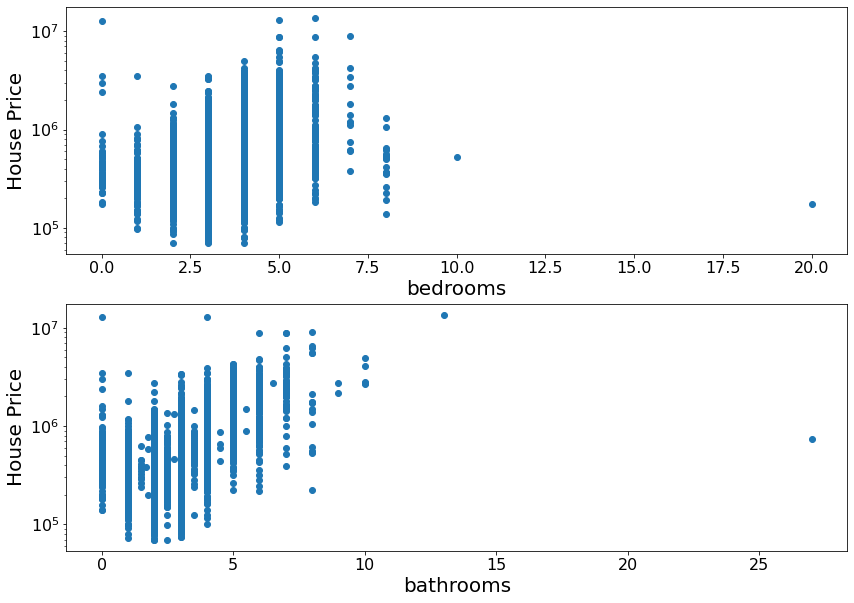

In [36]:
# price and number of bathrooms:

fig, ax = plt.subplots(2, figsize=(14, 10))
ax[0].scatter(x = df['numOfBedrooms'], y = df['latestPrice'])
ax[0].set_xlabel("bedrooms")
ax[0].set_ylabel("House Price")
ax[0].set_yscale('log')

ax[1].scatter(x = df['numOfBathrooms'], y = df['latestPrice'])
ax[1].set_xlabel("bathrooms")
ax[1].set_ylabel("House Price")
ax[1].set_yscale('log')

plt.show()

In [38]:
# lets check out the listing with 20 bedrooms:
df.loc[df['numOfBedrooms']==20].T

,8597
zpid,2094498207
city,austin
streetAddress,4902 Duval Rd R2 #R2
zipcode,78727
description,"Lovely convenient condo, with a private wooded..."
latitude,30.4155
longitude,-97.7372
propertyTaxRate,1.98
garageSpaces,0
hasAssociation,True


In [39]:
# this has to be a mistake: A Condo for less than 200K having 20 bedrooms with 2 bathrooms 
# and 900 sq ft does not makes sense. lets drop this entry:

# drop the listing with 20 bedrooms
b = df[(df.numOfBedrooms == 20)].index
df= df.drop(b)

In [40]:
# lets also check the listing with more than 25 bathrooms
df.loc[df['numOfBathrooms']>20].T

,2838
zpid,111972888
city,austin
streetAddress,4212 Far West Blvd
zipcode,78731
description,Well-maintained home in highly desirable North...
latitude,30.3614
longitude,-97.7697
propertyTaxRate,1.98
garageSpaces,2
hasAssociation,False


In [41]:
# this has to be a mistake: 27 bathrooms with 4 bedrooms and 2000 sq ft does not makes sense. lets drop this entry:
# drop the home with 2 bedrooms
b = df[(df.numOfBathrooms == 27)].index
df = df.drop(b)

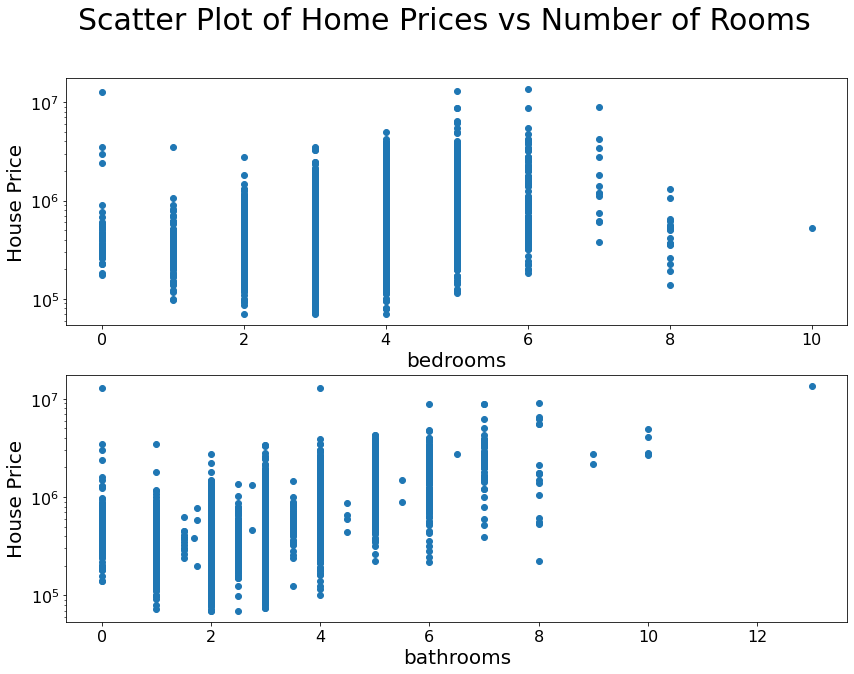

In [42]:
# lets graph the bed/bath rooms again with price:

fig, ax = plt.subplots(2, figsize=(14, 10))

plt.suptitle('Scatter Plot of Home Prices vs Number of Rooms', fontsize=30)
ax[0].scatter(x = df['numOfBedrooms'], y = df['latestPrice'])
ax[0].set_xlabel("bedrooms")
ax[0].set_ylabel("House Price")
ax[0].set_yscale('log')

ax[1].scatter(x = df['numOfBathrooms'], y = df['latestPrice'])
ax[1].set_xlabel("bathrooms")
ax[1].set_ylabel("House Price")
ax[1].set_yscale('log')

plt.show()

In [43]:
# why are there so many expensive listings with 0 bedrooms and 0 bathrooms?
# let's check these listings out:
df.loc[(df['numOfBedrooms']==0) | (df['numOfBathrooms']==0)].sort_values(['latestPrice'])

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
964,124904977,austin,12804 River Bnd,78732,"12804 River Bnd, Austin, TX 78732 is a vacant ...",30.329847,-97.926910,1.98,0,False,...,1,1,3.833333,8.333333,1533,17,0.0,3,2,124904977_1ca138dcc39f9d6183b5512f0df65ad8-p_f...
7267,64784657,austin,11506 Joy St,78748,Fabulous lot in rapidly growing South Austin n...,30.152084,-97.831512,1.98,1,False,...,1,1,1.400000,3.666667,1458,15,0.0,3,1,64784657_7e727e180983c94c41045d99b48a52e2-p_f.jpg
5288,29502899,austin,7902 Persimmon Trl,78745,Fixer upper!! This home offers a huge kitchen ...,30.187801,-97.800835,1.98,0,False,...,1,1,1.466667,3.333333,1409,14,0.0,3,1,29502899_ec4154fb5d3e7e06fdde4b3353f7a784-p_f.jpg
13314,29330022,austin,1405 Hartford Rd APT 202,78703,Old West Austin Efficiency. Close to metro/UT ...,30.284014,-97.762421,1.98,0,True,...,1,1,0.600000,6.000000,1189,16,1.0,0,1,29330022_325baca18f3fe6664c210987fd58ed8a-p_f.jpg
14056,29613814,austin,8404 Alvin High Ln,78729,"8404 Alvin High Ln, Austin, TX 78729 is a sing...",30.460995,-97.759834,2.21,0,True,...,1,1,1.200000,5.333333,1369,12,0.0,3,1,29613814_streetviewlocation8404AlvinHighLn2CAu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,29397153,austin,1106 Claire Ave,78703,"1106 Claire Ave, Austin, TX 78703 is a single ...",30.294628,-97.749329,1.98,0,False,...,1,1,1.500000,7.000000,1298,16,0.0,4,1,29397153_fda7ae0c8bc3e617bd7ec97fa49c3e08-p_f.jpg
10191,29383466,austin,3201 Holton St,78702,Welcoming home perfect for your family with a ...,30.257196,-97.705795,1.98,0,False,...,1,1,1.066667,3.666667,396,10,0.0,0,1,29383466_dd8b543940aaa0a11f7a3659ff0c113b-p_f.jpg
1522,63834676,austin,10800 River Terrace Cir,78733,Remarkable opportunity to build a custom home ...,30.342413,-97.882538,1.98,1,True,...,3,0,4.600000,8.000000,1373,14,0.0,0,1,63834676_32735701edfe4fd626a92e0670ca43c5-p_f.jpg
13964,29328212,austin,3312 Bee Cave Rd,78746,Close-in Westlake estate lot on 5.95 park like...,30.275049,-97.801300,1.98,0,False,...,1,0,0.800000,8.500000,1656,14,0.0,0,2,29328212_streetviewlocation3312BeeCaveRd2CAust...


In [44]:
# many of these are empty lots, or errors. 
# let's drop all 134 entries with 0 bedrooms or 0 bathrooms listed

b = df[(df['numOfBedrooms']==0) | (df['numOfBathrooms']==0)].index
b

Int64Index([  311,   346,   964,  1023,  1051,  1122,  1399,  1522,  1842,
             1958,
            ...
            14257, 14313, 14357, 14494, 14512, 14622, 14682, 14716, 14789,
            14972],
           dtype='int64', length=134)

In [45]:
df = df.drop(b)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15012 non-null  int64  
 1   city                        15012 non-null  object 
 2   streetAddress               15012 non-null  object 
 3   zipcode                     15012 non-null  object 
 4   description                 15012 non-null  object 
 5   latitude                    15012 non-null  float64
 6   longitude                   15012 non-null  float64
 7   propertyTaxRate             15012 non-null  float64
 8   garageSpaces                15012 non-null  int64  
 9   hasAssociation              15012 non-null  bool   
 10  hasCooling                  15012 non-null  bool   
 11  hasGarage                   15012 non-null  bool   
 12  hasHeating                  15012 non-null  bool   
 13  hasSpa                      150

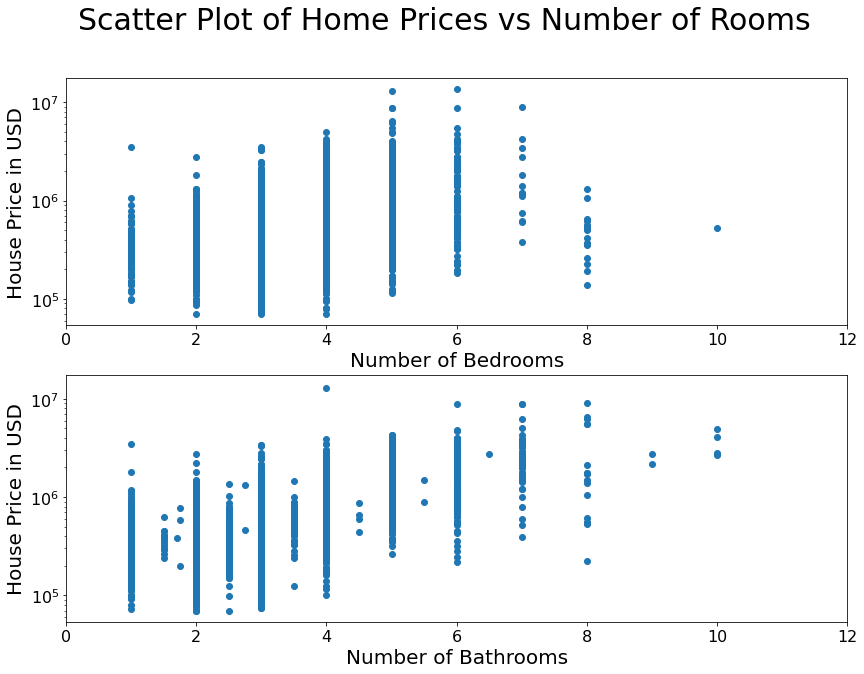

In [47]:
# lets graph the bed/bath rooms again with price:

fig, ax = plt.subplots(2, figsize=(14, 10))
plt.suptitle('Scatter Plot of Home Prices vs Number of Rooms', fontsize=30)
ax[0].scatter(x = df['numOfBedrooms'], y = df['latestPrice'])
ax[0].set_xlabel("Number of Bedrooms")
ax[0].set_xlim(0,12)
ax[0].set_ylabel("House Price in USD")
ax[0].set_yscale('log')

ax[1].scatter(x = df['numOfBathrooms'], y = df['latestPrice'])
ax[1].set_xlabel("Number of Bathrooms")
ax[1].set_xlim(0,12)

ax[1].set_ylabel("House Price in USD")
ax[1].set_yscale('log')

plt.show()

In [48]:
# bedrooms plot looks ok.
# bathroom plot has a lot of points in between 1 and 3 that seem odd. let's check these out:
# lets see what the unique values are..
df.numOfBathrooms.value_counts().sort_index()

1.00      922
1.50       13
1.70        1
1.75        3
2.00     6090
2.50      125
2.75        2
3.00     5277
3.50       44
4.00     1881
4.50        4
5.00      405
5.50        2
6.00      156
6.50        1
7.00       61
8.00       17
9.00        2
10.00       5
13.00       1
Name: numOfBathrooms, dtype: int64

In [49]:
# everything seems ok, except for 1.7 and 1.75 bathrooms. we will change these to 1.5
# 2.75 bathrooms seems off, we will change these to 2.5 bathrooms. 
# all other values for bathrooms seem reasonable (either a whole number or ending in .5 (half bath))
df.loc[(df['numOfBathrooms']==1.70) | (df['numOfBathrooms']==1.75), 'numOfBathrooms'] = 1.5

df.loc[df['numOfBathrooms']==2.75, 'numOfBathrooms'] = 2.5

df.numOfBathrooms.value_counts().sort_index()

1.0      922
1.5       17
2.0     6090
2.5      127
3.0     5277
3.5       44
4.0     1881
4.5        4
5.0      405
5.5        2
6.0      156
6.5        1
7.0       61
8.0       17
9.0        2
10.0       5
13.0       1
Name: numOfBathrooms, dtype: int64

In [50]:
# checking out the columns we are interested in graphing 
df[['numOfBedrooms', 'numOfBathrooms', 'latestPrice']].head()

,numOfBedrooms,numOfBathrooms,latestPrice
0,4,3.0,305000
1,4,2.0,295000
2,3,2.0,256125
3,3,2.0,240000
4,3,3.0,239900


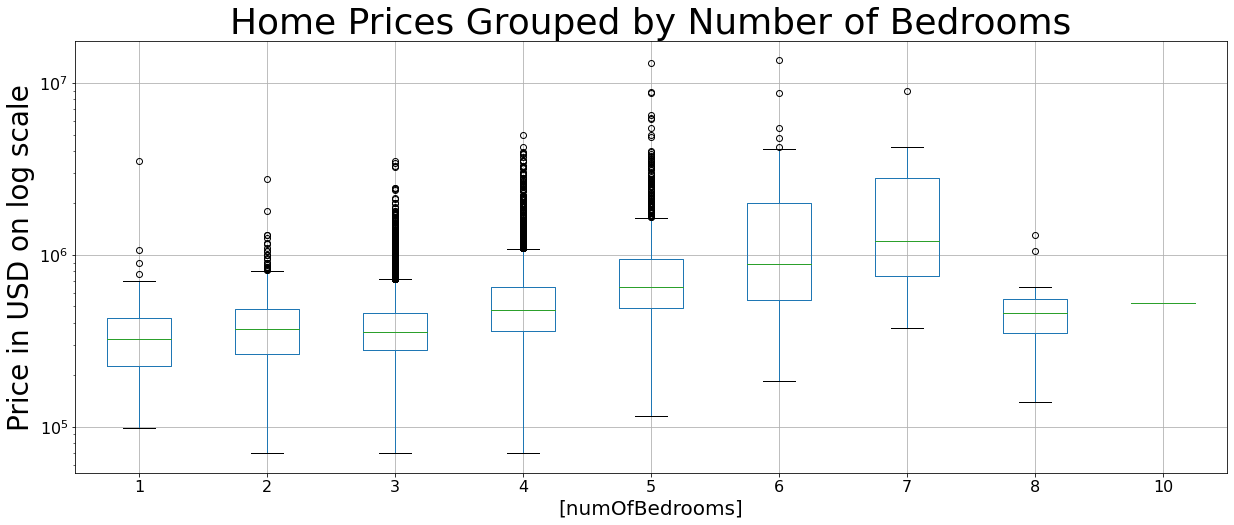

In [51]:
# lets now plot this as a BOXPLOT instead  
df.boxplot(column=['latestPrice'], by=['numOfBedrooms'], figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')

plt.ylabel('Price in USD on log scale', fontsize=28)
#plt.title('Home Prices Grouped by Number of Rooms')
plt.title('Home Prices Grouped by Number of Bedrooms', fontsize=36)

plt.suptitle('')

plt.show()

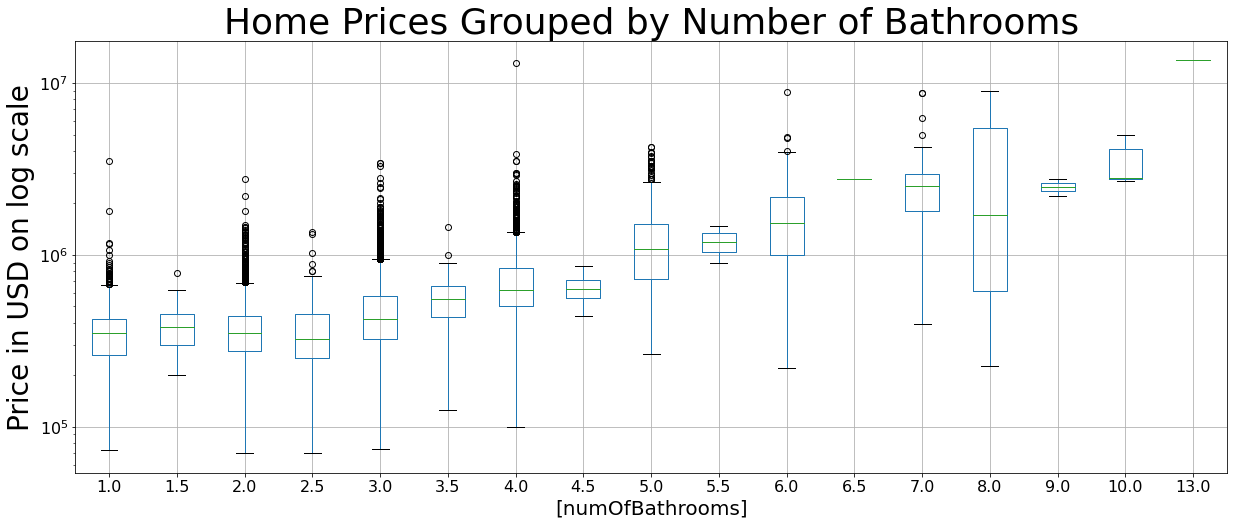

In [53]:

df.boxplot(column=['latestPrice'], by=['numOfBathrooms'], figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')

plt.ylabel('Price in USD on log scale', fontsize=28)
plt.title('Home Prices Grouped by Number of Bathrooms', fontsize=36)

plt.suptitle('')
plt.show()

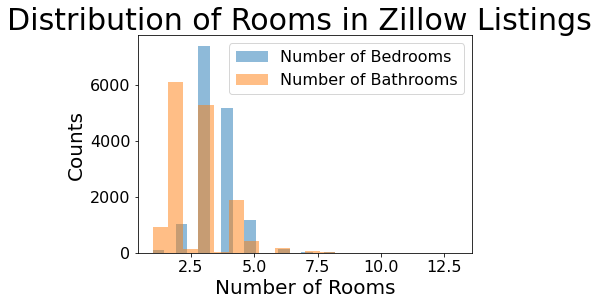

In [54]:
# Plotting the number of bedrooms and bathrooms represented in the data

fig, ax = plt.subplots(1, figsize=(6, 4))
plt.suptitle('Distribution of Rooms in Zillow Listings', fontsize=30)
plt.hist(df['numOfBedrooms'], bins = 20, alpha=0.5)
plt.hist(df['numOfBathrooms'], bins=20, alpha=0.5)
plt.xlabel('Number of Rooms', fontsize=20)
plt.ylabel('Counts', fontsize=20)
#plt.title('Distribution of Rooms in Zillow Listings', fontsize=30)
plt.legend(['Number of Bedrooms', 'Number of Bathrooms'])
plt.show()

Text(0.5, 1.0, 'Home Prices by Living Area')

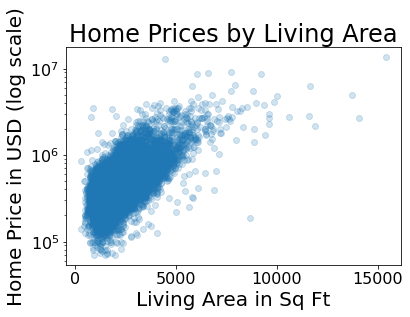

In [72]:
# lets plot living area by price again
fig, ax = plt.subplots(1, figsize=(6, 4))
plt.scatter(df['livingAreaSqFt'], df['latestPrice'], alpha=.2)
plt.xlabel('Living Area in Sq Ft', fontsize=20)
plt.ylabel("Home Price in USD (log scale)", fontsize=20)
plt.yscale('log')
plt.title('Home Prices by Living Area', fontsize=24)
#plt.plot.scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
#ax.set_xlabel('Living Area in Sq Ft')
#ax.set_ylabel("House Price on log scale")
#ax.set_yscale('log')

#plt.show()

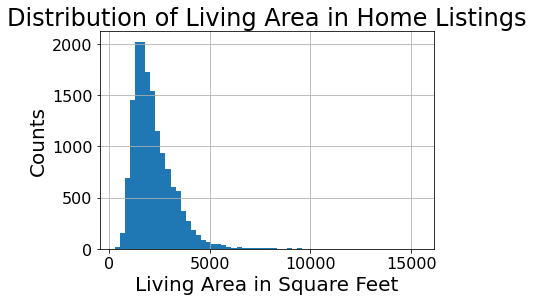

In [57]:
fig, ax = plt.subplots(1, figsize=(6,4))
df['livingAreaSqFt'].hist(bins=60)
plt.xlabel('Living Area in Square Feet', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Distribution of Living Area in Home Listings', fontsize=24)

plt.show()

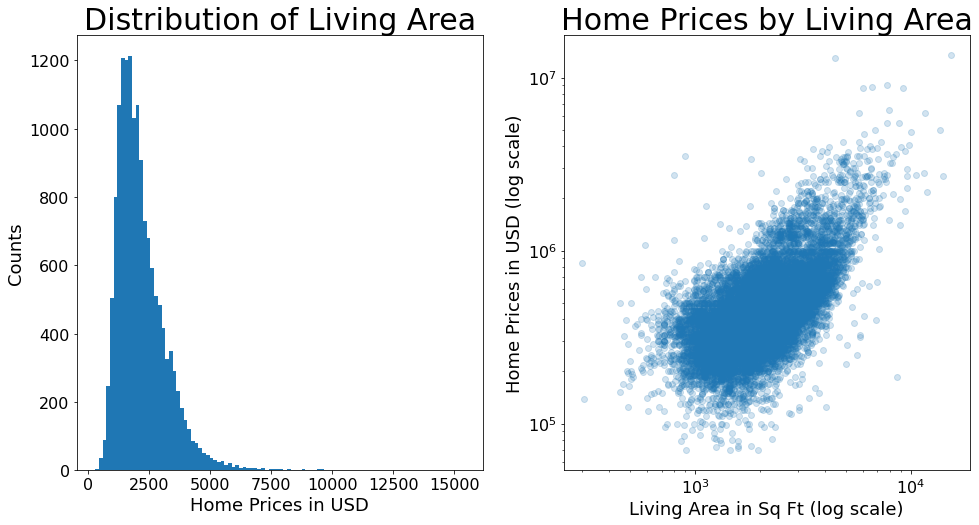

In [152]:
# Plotting the above 2 living area graphs next to eachother
fig, (ax1,ax2) = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (16,8)
#fig.suptitle('Living Area and Home Prices', fontsize=40)
#fig.suptitle('Living Area and Price')

ax1.hist(df['livingAreaSqFt'], bins=100)
ax1.set_title('Distribution of Living Area', fontsize=30)
#ax.set_xscale('log')

ax1.set_ylabel('Counts',fontsize=18)
ax1.set_xlabel('Home Prices in USD', fontsize=18)
ax1.ticklabel_format(style='plain')

ax2.scatter(df['livingAreaSqFt'], df['latestPrice'], alpha=0.2)
ax2.set_xscale('log')
#ax2.ticklabel_format(style='plain')
ax2.set_title('Home Prices by Living Area', fontsize=30)
ax2.set_ylabel('Home Prices in USD (log scale)',fontsize=18)
ax2.set_yscale('log')
ax2.set_xlabel('Living Area in Sq Ft (log scale)', fontsize=18)

plt.show()

Text(0.5, 1.0, 'Home Prices by Living Area')

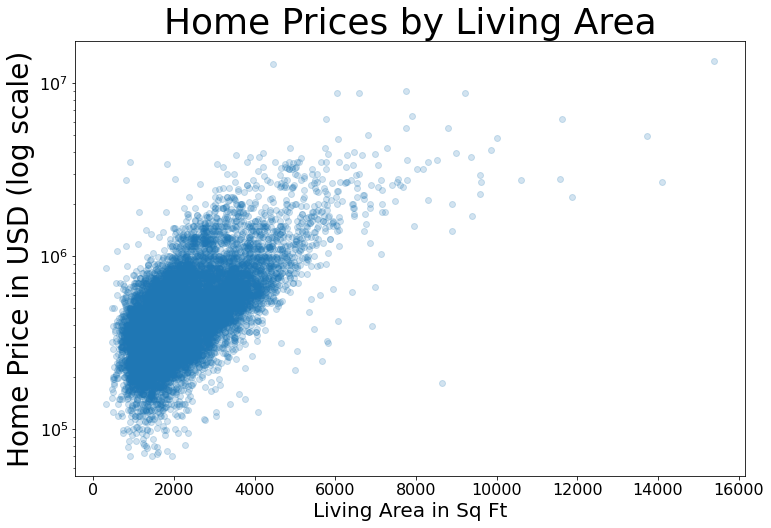

In [75]:
# lets plot living area by price again
fig, ax = plt.subplots(1, figsize=(12, 8))
plt.scatter(df['livingAreaSqFt'], df['latestPrice'], alpha=.2)
plt.xlabel('Living Area in Sq Ft', fontsize=20)
plt.ylabel("Home Price in USD (log scale)", fontsize=28)
plt.yscale('log')
plt.title('Home Prices by Living Area', fontsize=36)
#plt.plot.scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
#ax.set_xlabel('Living Area in Sq Ft')
#ax.set_ylabel("House Price on log scale")
#ax.set_yscale('log')

#plt.show()

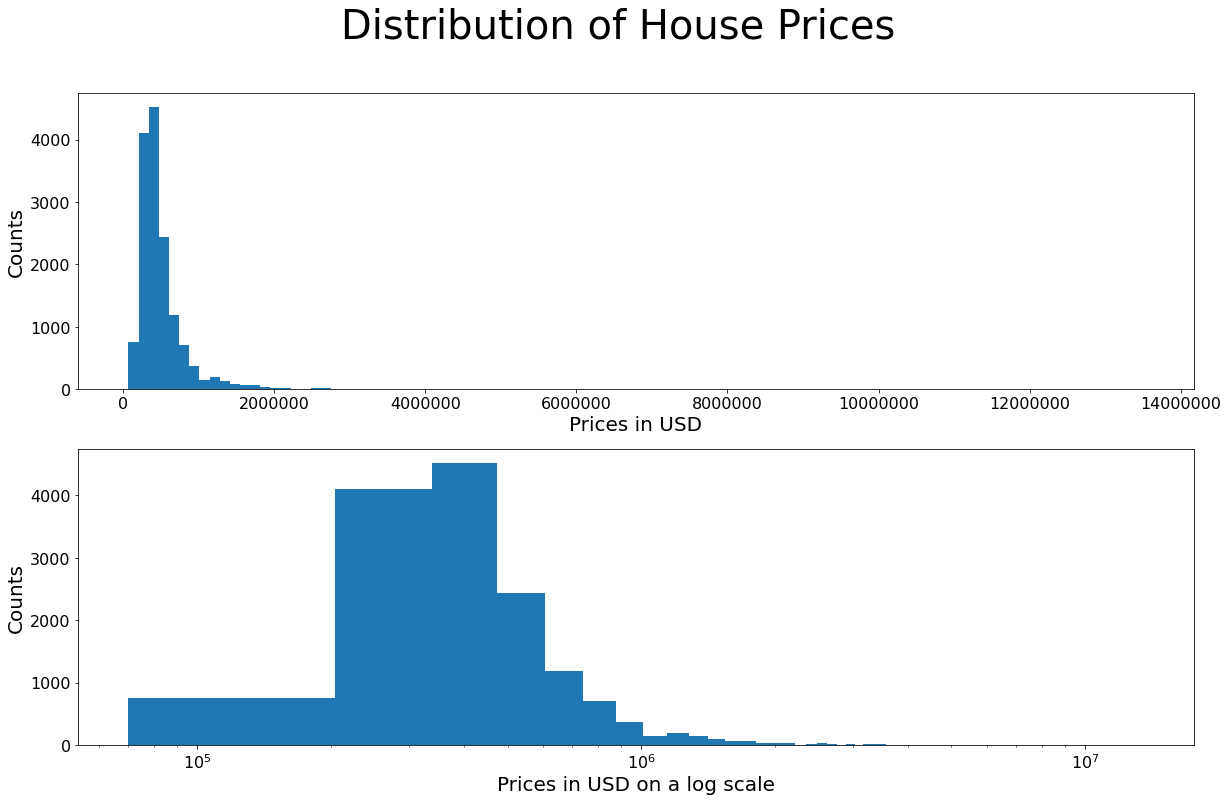

In [80]:
# Plotting the distribution of the prices
fig, (ax1,ax2) = plt.subplots(2,1)
plt.rcParams["figure.figsize"] = (20,12)
fig.suptitle('Distribution of House Prices', fontsize=40)


ax1.hist(df['latestPrice'], bins=100)
#ax1.ticklabel_format(style='sci')
#ax.set_xscale('log')

#ax1.set_title('')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Prices in USD')
ax1.ticklabel_format(style='plain')

ax2.hist(df['latestPrice'], bins=100)

ax2.set_xscale('log')
#ax2.ticklabel_format(style='plain')
#ax2.set_title('Distribution of House Prices')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Prices in USD on a log scale')

plt.show()

In [81]:
df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
zpid,15012,104342568,317467460,28584946,29411379,29494883,70338534,2146313225
latitude,15012,30,0,30,30,30,30,30
longitude,15012,-97,0,-98,-97,-97,-97,-97
propertyTaxRate,15012,1,0,1,1,1,1,2
garageSpaces,15012,1,1,0,0,1,2,22
parkingSpaces,15012,1,1,0,0,1,2,22
yearBuilt,15012,1988,21,1905,1975,1993,2006,2020
latestPrice,15012,512613,442040,70000,309033,405000,575000,13500000
numPriceChanges,15012,3,2,1,1,2,4,23
latest_salemonth,15012,6,3,1,4,7,9,12


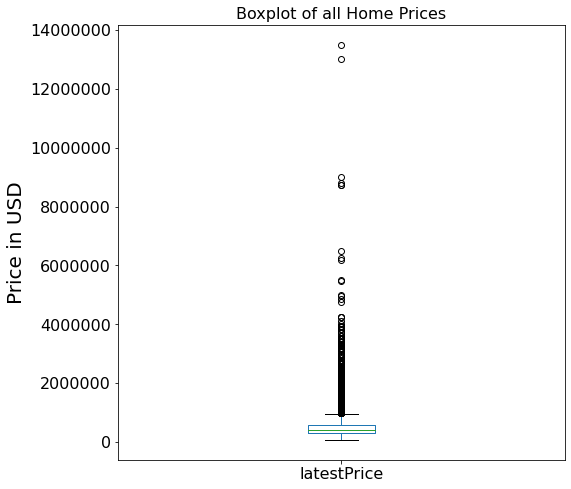

In [82]:
#boxplot of price
from matplotlib import ticker
df.latestPrice.plot(kind='box', figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))
plt.ylabel('Price in USD')
plt.title('Boxplot of all Home Prices')
plt.show()



In [83]:
# exploring zipcodes because this may affect price:

In [84]:
print(len(df['zipcode'].unique()))  # number of unique zipcodes = 48
df['zipcode'].value_counts()

48


78748    1137
78745    1025
78749     772
78704     693
78737     611
78739     604
78732     591
78759     559
78723     554
78757     519
78717     515
78731     490
78744     469
78753     439
78727     414
78754     393
78758     392
78702     383
78747     379
78750     321
78729     317
78735     308
78703     295
78721     244
78730     243
78728     224
78724     221
78741     217
78733     203
78746     191
78726     178
78751     172
78736     162
78725     161
78752     151
78756     137
78722      96
78617      85
78705      64
78660      36
78619      12
78734       9
78701       8
78719       5
78652       4
78653       4
78742       4
78738       1
Name: zipcode, dtype: int64

In [85]:
# exploring zip code and price

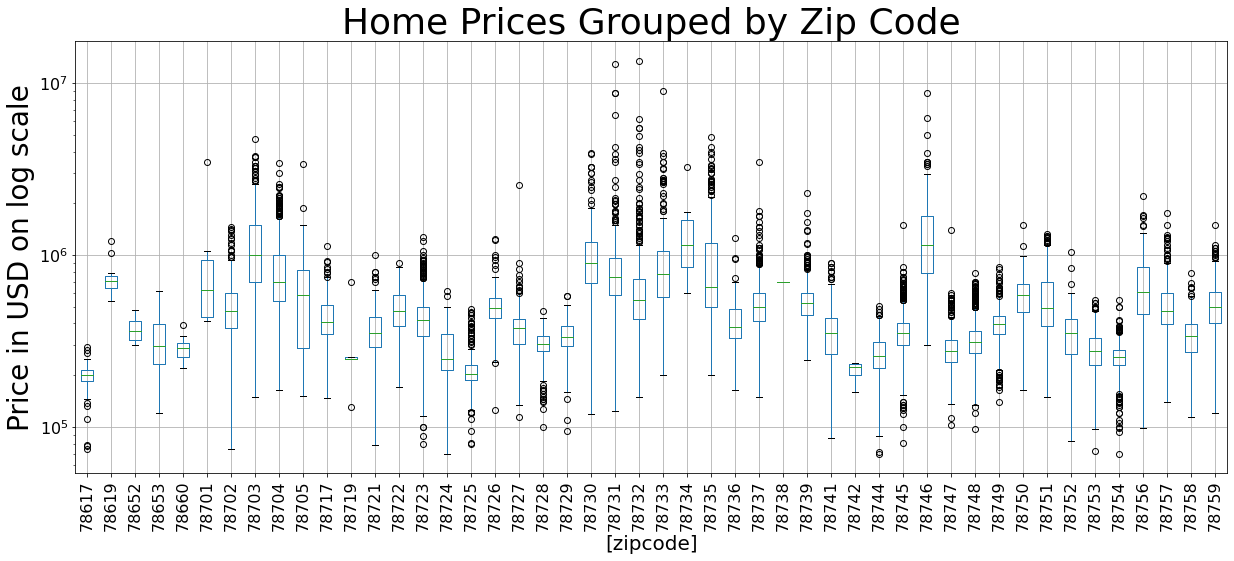

In [91]:
df.boxplot(column=['latestPrice'], by=['zipcode'], figsize=(20,8), rot=90)

plt.ticklabel_format(style='plain', axis='y')

#plt.xticklabels(rotation=90)
plt.yscale('log')
plt.ylabel('Price in USD on log scale', fontsize=28)
plt.title('Home Prices Grouped by Zip Code', fontsize=36)

plt.suptitle('')
plt.show()

In [93]:
# conclusion: zipcode may be important in predicting the price of a home

In [92]:
# exploring school rating
df['avgSchoolRating'].describe()

count    15012.000000
mean         5.782348
std          1.860265
min          2.333333
25%          4.000000
50%          5.778694
75%          7.000000
max          9.500000
Name: avgSchoolRating, dtype: float64

In [94]:
df['avgSchoolRating'].unique()

array([2.66666667, 3.        , 4.        , 3.66666667, 3.33333333,
       7.66666667, 8.33333333, 7.        , 8.        , 9.        ,
       6.        , 8.66666667, 5.33333333, 5.66666667, 9.33333333,
       4.66666667, 6.66666667, 5.77869409, 6.5       , 5.        ,
       4.33333333, 7.33333333, 9.5       , 8.5       , 3.5       ,
       6.33333333, 2.33333333])

Text(0.5, 1.0, 'Home Prices by Average School Rating')

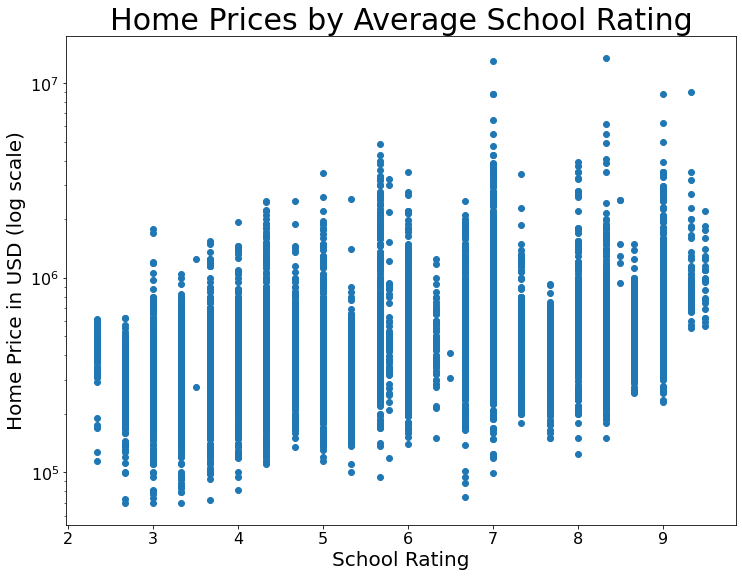

In [95]:
# lets plot living area by price again
fig, ax = plt.subplots(1, figsize=(12, 9))
plt.scatter(df['avgSchoolRating'], df['latestPrice'])
plt.xlabel('School Rating')
plt.ylabel("Home Price in USD (log scale)")
plt.yscale('log')
plt.title('Home Prices by Average School Rating', fontsize=30)
#plt.plot.scatter(x = df['livingAreaSqFt'], y = df['latestPrice'])
#ax.set_xlabel('Living Area in Sq Ft')
#ax.set_ylabel("House Price on log scale")
#ax.set_yscale('log')

#plt.show()

In [119]:
df['avgSchoolRating'] = df['avgSchoolRating'].round(decimals=1)
df.avgSchoolRating.value_counts().sort_index()

2.3      64
2.7     205
3.0     614
3.3    1209
3.5       2
3.7     959
4.0    1120
4.3     729
4.7     503
5.0     817
5.3     717
5.7     543
5.8      50
6.0     886
6.3      63
6.5       2
6.7    1224
7.0    1899
7.3     446
7.7     232
8.0     719
8.3     705
8.5       6
8.7     528
9.0     670
9.3      74
9.5      26
Name: avgSchoolRating, dtype: int64

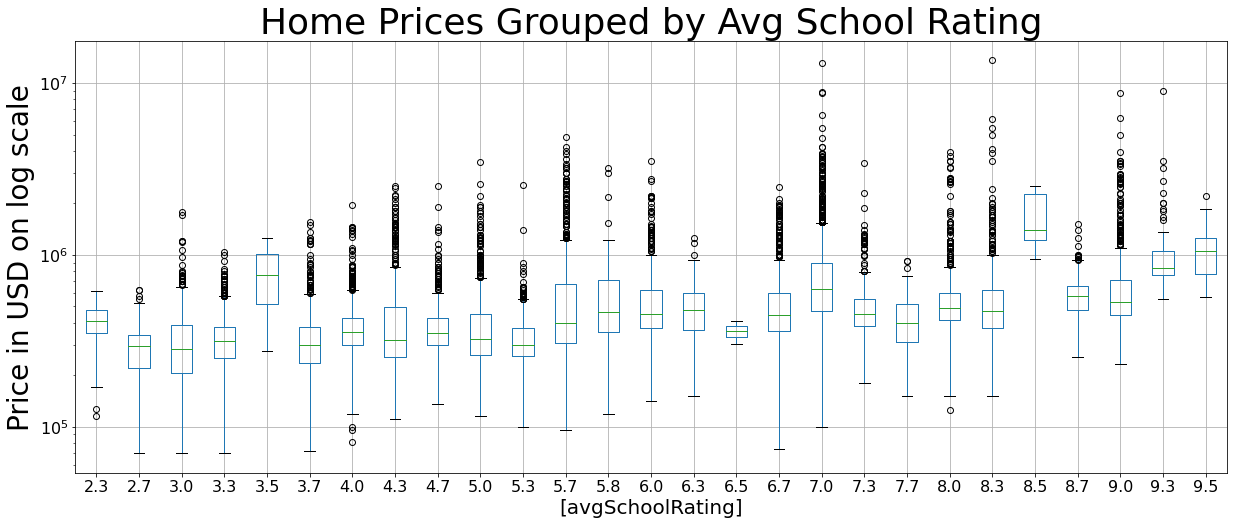

In [153]:
df.boxplot(column=['latestPrice'], by=['avgSchoolRating'], figsize=(20,8), rot=0)

plt.ticklabel_format(style='plain', axis='y')

#plt.xticklabels(rotation=90)
plt.yscale('log')
plt.ylabel('Price in USD on log scale', fontsize=28)
plt.title('Home Prices Grouped by Avg School Rating', fontsize=36)

plt.suptitle('')
plt.show()

<AxesSubplot:>

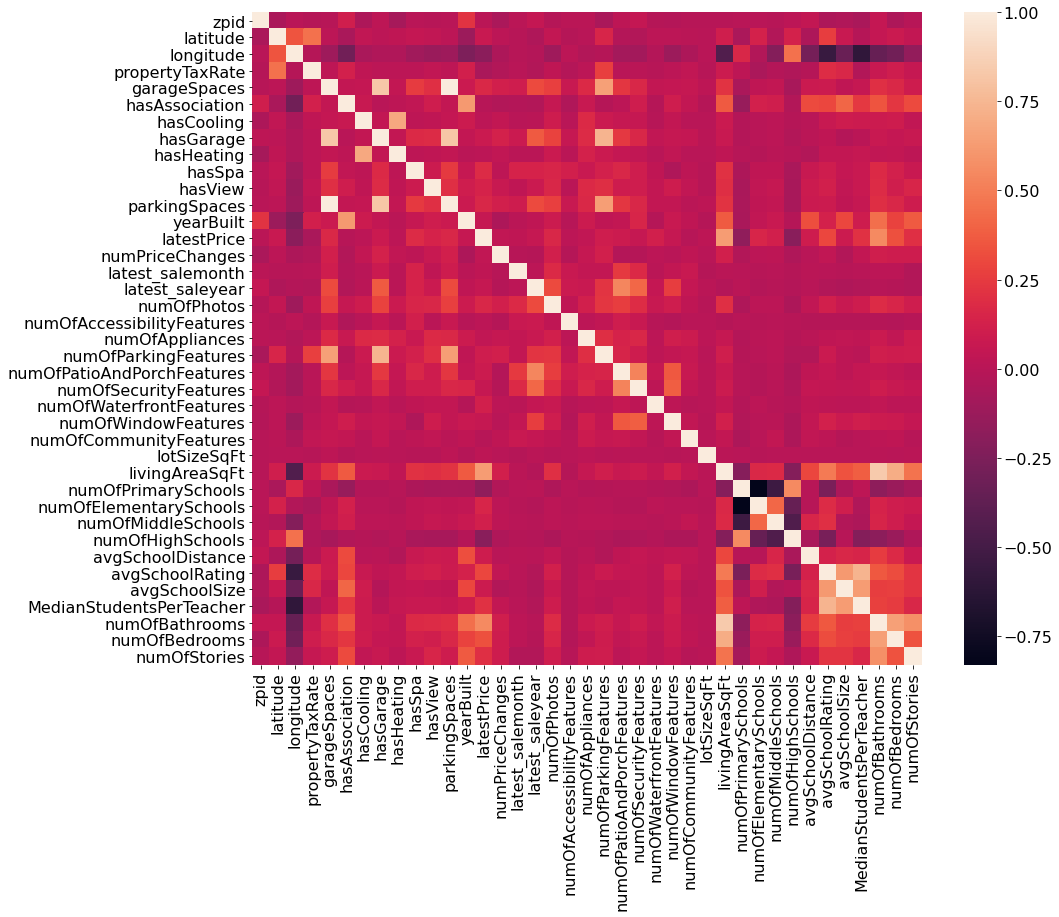

In [121]:
plt.rcParams["figure.figsize"] = (15,12)
sns.heatmap(df.corr())

# FINAL STUFF


In [122]:
# Creating a new dataframe with the only the two columns we need for the image analysis:


image_price_df = df[['homeImage','latestPrice']]
image_price_df.head()

,homeImage,latestPrice
0,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,305000
1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,295000
2,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,256125
3,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,240000
4,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,239900


In [123]:
image_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   homeImage    15012 non-null  object
 1   latestPrice  15012 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 351.8+ KB


In [124]:
# Renaming the columns 
image_price_df.rename(columns= 
              {'homeImage':'Image Name','latestPrice':'Price'}, inplace=True)

/Users/sangeetajayakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [125]:
image_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image Name  15012 non-null  object
 1   Price       15012 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 351.8+ KB


In [141]:
image_price_df.head()

,Image Name,Price
0,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,305000
1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,295000
2,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,256125
3,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,240000
4,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,239900


#### The final cleaned dataframe can be exported to a new csv file. 
commented out to not create multiple files

In [180]:
# output this new csv file 
#path_to_folder = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles'
#new_file_name = 'cleaned_AH_data.csv'


#image_price_df.to_csv(r'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/cleaned_AH_data_v2.csv', index=False)



### Dataset with home features

Making a dataframe with the features of the home to add to the neural network models along with the images.

In [128]:
# check that the df is as we expect it
print(df.shape)
df.head()

(15012, 47)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.7,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.7,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.0,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.7,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.0,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [129]:
features = [ 'latestPrice','homeImage','zipcode','longitude', 
            'livingAreaSqFt','numOfBathrooms', 'numOfBedrooms',
            'numOfPrimarySchools', 'numOfHighSchools', 'avgSchoolRating']

In [130]:
features_df = df[features]
features_df.head()

,latestPrice,homeImage,zipcode,longitude,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfPrimarySchools,numOfHighSchools,avgSchoolRating
0,305000,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,78660,-97.663078,2601.0,3.0,4,1,1,2.7
1,295000,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,78660,-97.661697,1768.0,2.0,4,1,1,2.7
2,256125,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,78660,-97.639771,1478.0,2.0,3,0,1,3.0
3,240000,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,78660,-97.661659,1678.0,2.0,3,1,1,2.7
4,239900,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,78660,-97.656860,2132.0,3.0,3,1,1,4.0


In [131]:
features_df.describe().astype(int)

,latestPrice,longitude,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfPrimarySchools,numOfHighSchools,avgSchoolRating
count,15012,15012,15012,15012,15012,15012,15012,15012
mean,512613,-97,2196,2,3,0,0,5
std,442040,0,1023,1,0,0,0,1
min,70000,-98,300,1,1,0,0,2
25%,309033,-97,1486,2,3,1,1,4
50%,405000,-97,1976,3,3,1,1,5
75%,575000,-97,2686,3,4,1,1,7
max,13500000,-97,15394,13,10,2,2,9


In [133]:
features_df.latestPrice.describe().astype(int)

count       15012
mean       512613
std        442040
min         70000
25%        309033
50%        405000
75%        575000
max      13500000
Name: latestPrice, dtype: int64

In [135]:
print('The number of homes under $1M: ', + len(features_df[features_df['latestPrice']<1000000]))
print('The percentage of homes under $1M: ' + 
      str(int(len(features_df[features_df['latestPrice']<1000000])/len(features_df)*100))+ '%')

The number of homes under $1M:  14068
The percentage of homes under $1M: 93%


In [136]:
features_df.rename(columns= 
              {'latestPrice':'Price', 'homeImage': 'Image Name'}, inplace=True)

/Users/sangeetajayakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [137]:
features_df['Image Name'] = features_df['Image Name'].str.rstrip('.jpg')

<ipython-input-137-0fbc0d12da16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['Image Name'] = features_df['Image Name'].str.rstrip('.jpg')


In [138]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 15170
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                15012 non-null  int64  
 1   Image Name           15012 non-null  object 
 2   zipcode              15012 non-null  object 
 3   longitude            15012 non-null  float64
 4   livingAreaSqFt       15012 non-null  float64
 5   numOfBathrooms       15012 non-null  float64
 6   numOfBedrooms        15012 non-null  int64  
 7   numOfPrimarySchools  15012 non-null  int64  
 8   numOfHighSchools     15012 non-null  int64  
 9   avgSchoolRating      15012 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [139]:
features_df.head()

,Price,Image Name,zipcode,longitude,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfPrimarySchools,numOfHighSchools,avgSchoolRating
0,305000,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f,78660,-97.663078,2601.0,3.0,4,1,1,2.7
1,295000,120900430_8255c127be8dcf0a1a18b7563d987088-p_f,78660,-97.661697,1768.0,2.0,4,1,1,2.7
2,256125,2084491383_a2ad649e1a7a098111dcea084a11c855-p_f,78660,-97.639771,1478.0,2.0,3,0,1,3.0
3,240000,120901374_b469367a619da85b1f5ceb69b675d88e-p_f,78660,-97.661659,1678.0,2.0,3,1,1,2.7
4,239900,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f,78660,-97.656860,2132.0,3.0,3,1,1,4.0


In [90]:
# output to a new csv file

#commented out to prevent duplicate files
#features_df.to_csv(r'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/cleaned_features_data_v1.csv', index=False)